In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
aus_population = pd.read_csv('fpppy_data\data\global_economy.csv').query('`Code` == "AUS"').filter(['ds', 'Population']).rename({'Population': 'y'}, axis=1).reset_index(drop=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shivk\AppData\Local\Temp\ipykernel_12816\3322244893.py:1: SyntaxWarning: invalid escape sequence '\d'
  aus_population = pd.read_csv('fpppy_data\data\global_economy.csv').query('`Code` == "AUS"').filter(['ds', 'Population']).rename({'Population': 'y'}, axis=1).reset_index(drop=True)


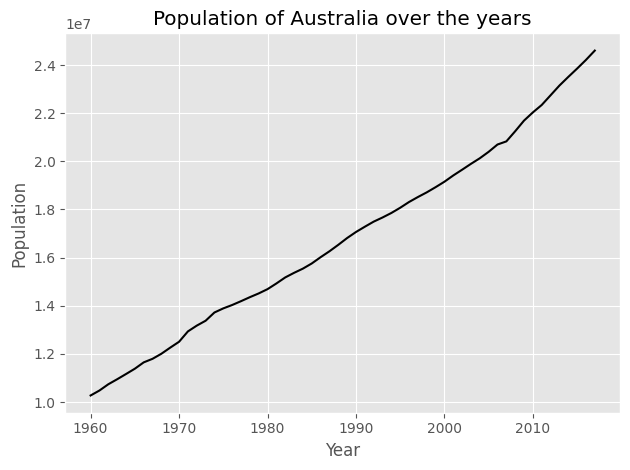

In [4]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_population['ds'], aus_population['y'], c='k')
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Population of Australia over the years")

plt.tight_layout()
plt.show()

In [5]:
def random_walk_with_drift(y, h):
    yT = y[-1]
    y1 = y[0]
    T = y.shape[0]

    return yT+h*((yT-y1)/(T-1))

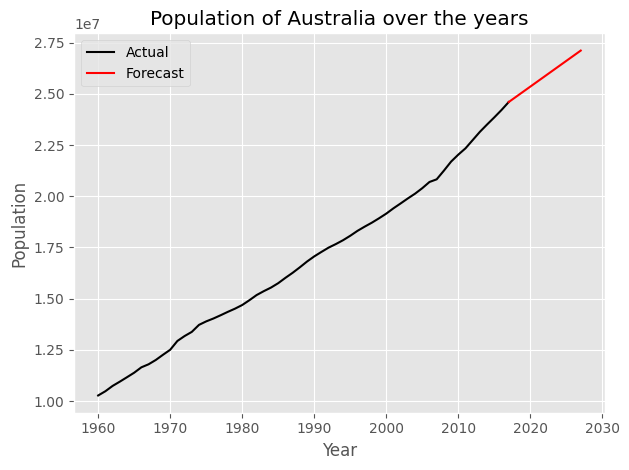

In [6]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_population['ds'], aus_population['y'], c='k', label='Actual')
ax.plot(range(aus_population['ds'].max(), aus_population['ds'].max()+11), [random_walk_with_drift(aus_population['y'].values, i) for i in range(0, 11)], c='r', label='Forecast')

ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.legend()
ax.set_title("Population of Australia over the years")

plt.tight_layout()
plt.show()

In [7]:
aus_bricks_prod = pd.read_csv(r'fpppy_data\data\aus_production.csv').filter(['ds', 'Bricks']).rename({'Bricks': 'y'}, axis=1).dropna(axis=0)

In [8]:
aus_bricks_prod.head()

,ds,y
0,1956-01-01,189.0
1,1956-04-01,204.0
2,1956-07-01,208.0
3,1956-10-01,197.0
4,1957-01-01,187.0


In [40]:
aus_bricks_prod['ds'] = pd.to_datetime(aus_bricks_prod['ds'])

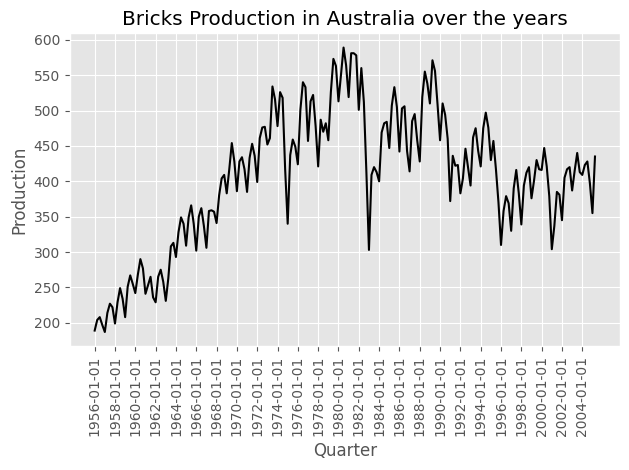

In [9]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod['ds'], aus_bricks_prod['y'], c='k')
ax.set_xticks(aus_bricks_prod['ds'][::8], aus_bricks_prod['ds'][::8], rotation=90)
ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.set_title("Bricks Production in Australia over the years")

plt.tight_layout()
plt.show()

In [10]:
def seasonal_naive(y, h, m):
    k = int((h-1)/m)
    yT = y[-1]
    return yT+h-m*(k+1)

In [49]:
from datetime import timedelta
pred_qtr = [aus_bricks_prod['ds'].max()]
pred_val = [aus_bricks_prod['y'].values[-1]]
for h in range(40):
    pred_qtr.append(pred_qtr[-1] + pd.tseries.offsets.QuarterEnd() + timedelta(days=1))
    pred_val.append(seasonal_naive(aus_bricks_prod['y'].values, h, 4))

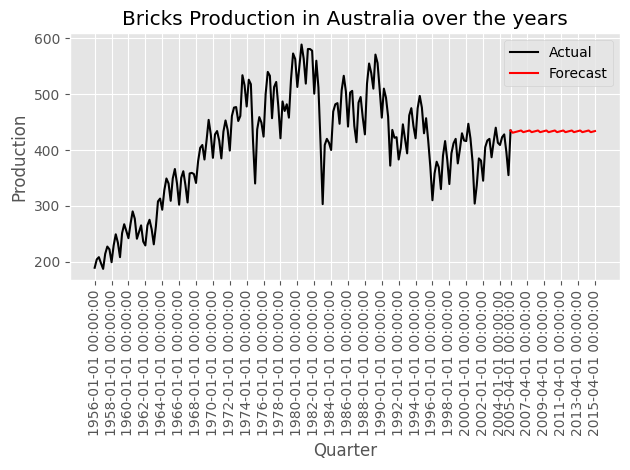

In [77]:
fig = plt.figure()
ax = fig.gca()

ax.plot(aus_bricks_prod['ds'], aus_bricks_prod['y'], c='k', label='Actual')
ax.plot(pred_qtr, pred_val, c='r', label='Forecast')

ax.set_xticks(list(aus_bricks_prod['ds'][::8])+pred_qtr[::8], list(aus_bricks_prod['ds'][::8])+pred_qtr[::8], rotation=90)
ax.set_xlabel("Quarter")
ax.set_ylabel("Production")
ax.legend()
ax.set_title("Bricks Production in Australia over the years")

plt.tight_layout()
plt.show()

In [74]:
aus_livestock = pd.read_csv('fpppy_data/data/aus_livestock.csv')
nsw_lambs = aus_livestock.query('`unique_id` == "New South Wales_Lambs"').filter(['ds', 'y'])
nsw_lambs['ds'] = pd.to_datetime(nsw_lambs['ds'], format="%Y-%m-%d")
nsw_lambs.head()

,ds,y
17088,1972-07-01,587600.0
17089,1972-08-01,553700.0
17090,1972-09-01,494900.0
17091,1972-10-01,533500.0
17092,1972-11-01,574300.0


In [84]:
nsw_lambs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 17088 to 17645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      558 non-null    datetime64[ns]
 1   y       558 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


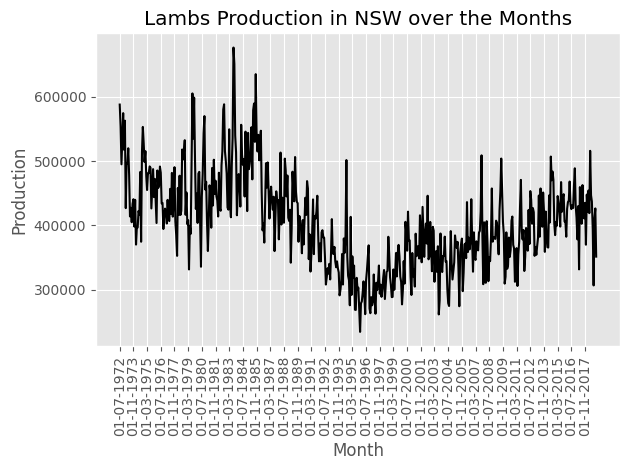

In [103]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nsw_lambs['ds'], nsw_lambs['y'], c='k')
ax.set_xticks(nsw_lambs['ds'][::16], nsw_lambs['ds'][::16].dt.strftime('%d-%m-%Y'), rotation=90)
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.set_title("Lambs Production in NSW over the Months")

plt.tight_layout()
plt.show()

In [78]:
def naive(y):
    return y[-1]

In [100]:
from datetime import timedelta
pred_per = [nsw_lambs['ds'].max()]
pred_val = [nsw_lambs['y'].values[-1]]
for _ in range(40):
    pred_per.append((pred_per[-1] + pd.tseries.offsets.MonthEnd() + timedelta(days=1)))
    pred_val.append(naive(nsw_lambs['y'].values))

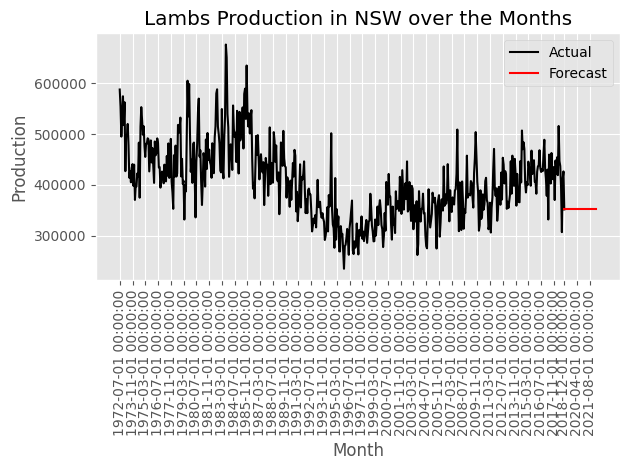

In [104]:
fig = plt.figure()
ax = fig.gca()

ax.plot(nsw_lambs['ds'], nsw_lambs['y'], c='k', label='Actual')
ax.plot(pred_per, pred_val, c='r', label='Forecast')

ax.set_xticks(list(nsw_lambs['ds'][::16])+pred_per[::16], list(nsw_lambs['ds'][::16])+pred_per[::16], rotation=90)
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.legend()
ax.set_title("Lambs Production in NSW over the Months")

plt.tight_layout()
plt.show()